<a href="https://colab.research.google.com/github/Allisonolazabal-collab/Voter-Registration-from-2016-and-2020/blob/main/Allison_Olazabal_Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



The main goal of my project is to show how new voter registrations within 12 states from 2016 and 2020 declined the most during the months of March and April in 2020.
It's important for someone to read this notebook to recognizes how Covid may have influenced the number of voter registrations, and different factors influencing the numbers such as the state and month.

Question 1: Which months had the biggest decline in voter registrations from 2016 to 2020?

Question 2: In Florida, what month spiked up, and what month significantly dropped in voter registration comparing 2016 to 2020?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [4]:
voters.head(16)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
5,Arizona,2020,Feb,50853
6,Arizona,2020,Mar,31872
7,Arizona,2020,Apr,10249
8,California,2016,Jan,87574
9,California,2016,Feb,103377


Year: accounts for the year 2016 or 2020

Month: accounts for the month the state gained new voter registrations

Jurisdiction: accoutns for the states in this dataset

New registered voters: # of newly registered voters within the year, month, and state of their row

Check for any missing data data. (1 point)

In [5]:
voters.isnull().values.any()

False

Check your data types. (1 point)

In [6]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [7]:
voters = voters.rename(columns={"Jurisdiction":"NAME"})

In [8]:
voters = voters.rename(columns={"New registered voters":"registered_voters"})

Explain any potential limitations to your data (2 points)

There is no column to compare the change in the total amount of new voters from 2016 to 2020, to analyze the change that happened from the two elections. We also can't can't examine the total amount of registrations for each state in the year 2016, and 2020. This take's away from efficiency in calculating and creating insights on voter registration trends post-Covid.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [9]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration was 238,281 in California of February 2020

What is the average voter registration? (1 points)

In [10]:
voters["registered_voters"].mean()

48223.46226415094

The average voter registration is around 48,223 people

In [11]:
Average = voters["registered_voters"].mean()

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [12]:
high_voters = voters.loc[voters.registered_voters > Average]

In [13]:
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


There are 36 times where the voter registration was higher than the average

How many times did each state go above the national average for new voter registration? (2 points)



In [25]:
high_voters.head(36)

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


Arizona: 3x, California: 7x, Florida: 7x, Georgia: 1x, Illinois: 4x, North Carolina: 6x, Texas: 8x

Colorado, Deleware, District of Columbia, Maryland, Virginia did not go above the national average, so zero times



Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [14]:
state_averages = voters.groupby("NAME")["registered_voters"].mean()

In [15]:
state_averages.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


In [ ]:
California, Texas, and Florida had the highest average voter registration overall

##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [20]:
total_voters = voters.groupby("NAME")["registered_voters"].sum().sort_values(ascending=False)
total_voters = pd.DataFrame(total_voters)

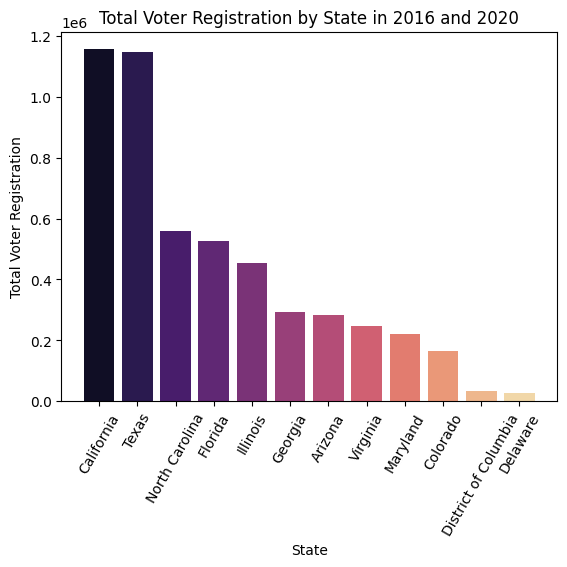

In [26]:
sns.barplot(total_voters, x = "NAME", y="registered_voters", palette = "magma", hue="NAME")
plt.plot(figsize = [10,10])
plt.xlabel("State")
plt.ylabel("Total Voter Registration")
plt.title("Total Voter Registration by State in 2016 and 2020")
plt.xticks(rotation=60)
plt.show()

California and Texas carry a significant lead over the other states for total voter registration, almost double the total voter registration of the third highest, North Carolina. District of Columbia and Deleware are significantly low in their total new voter registrations.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

In [22]:
colors = ["crimson", "orange", "green", "teal", "blue"]
months_order = ["January", "February", "March", "April", "May"]

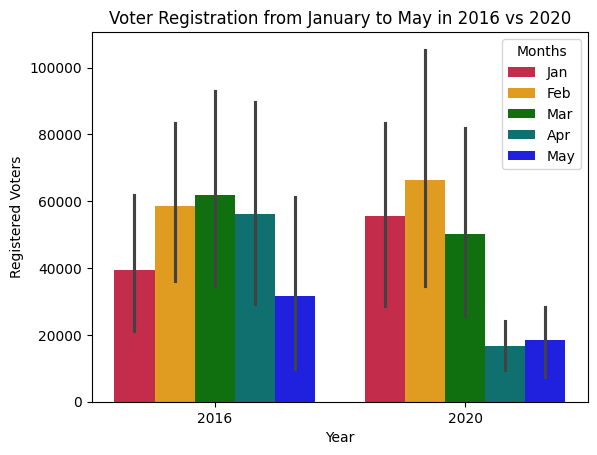

In [23]:
sns.barplot(voters, x = "Year", y="registered_voters", palette=colors, hue="Month")
plt.legend(title="Months")
plt.plot(figsize = [20,20])
plt.xlabel("Year")
plt.ylabel("Registered Voters")
plt.title("Voter Registration from January to May in 2016 vs 2020")
plt.show()

Analyzing the months of new registered voters in the year 2016, the barplot shows a somewhat even distribution of voter registrations increasing up until March, where after it starts to decline, where May falls below the initial voter registration of January 2016.

In comparison to 2020, you can see that the voter registration in January is higher than 2016. However, since covid had started mid March, the decline is voter registration started early within this month. April is when the largest decline occured as more people were in isolation.  

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In [27]:
Florida = voters.loc[voters.NAME=="Florida"]

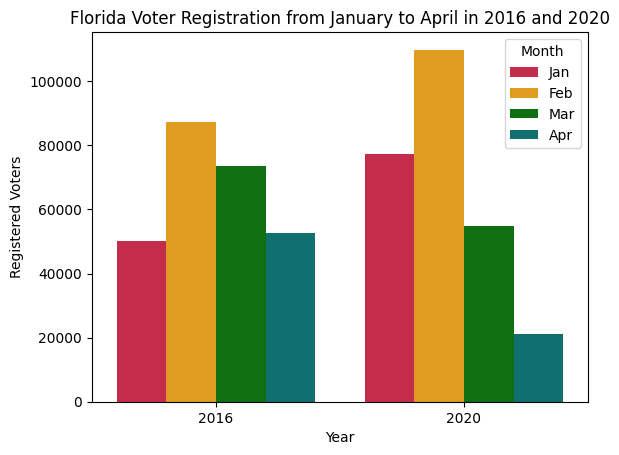

In [28]:
sns.barplot(Florida, x="Year", y="registered_voters", palette = ["crimson", "orange", "green", "teal"], hue="Month")
plt.xlabel("Year")
plt.ylabel("Registered Voters")
plt.title("Florida Voter Registration from January to April in 2016 and 2020")
plt.show()

Comparing the new registrations from 2016 and 2020, the months that increased the most where January and February. The months that declined the most was March. The slight decline from February to March in 2016, and comparing it side by side to the sharp decline from February to March in 2020 is noteworthy.   

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [29]:
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [30]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

In [31]:
bbox = states.cx[minx:maxx, miny:maxy]
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [34]:
avg_voters = voters.groupby("NAME")["registered_voters"].mean()
avg_voters = pd.DataFrame(total_voters)

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [35]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [40]:
state_avg = bbox.merge(avg_voters, how="inner", on="NAME")

In [41]:
state_avg.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",560408
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",248452
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",526945
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",1146101
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",1156363


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

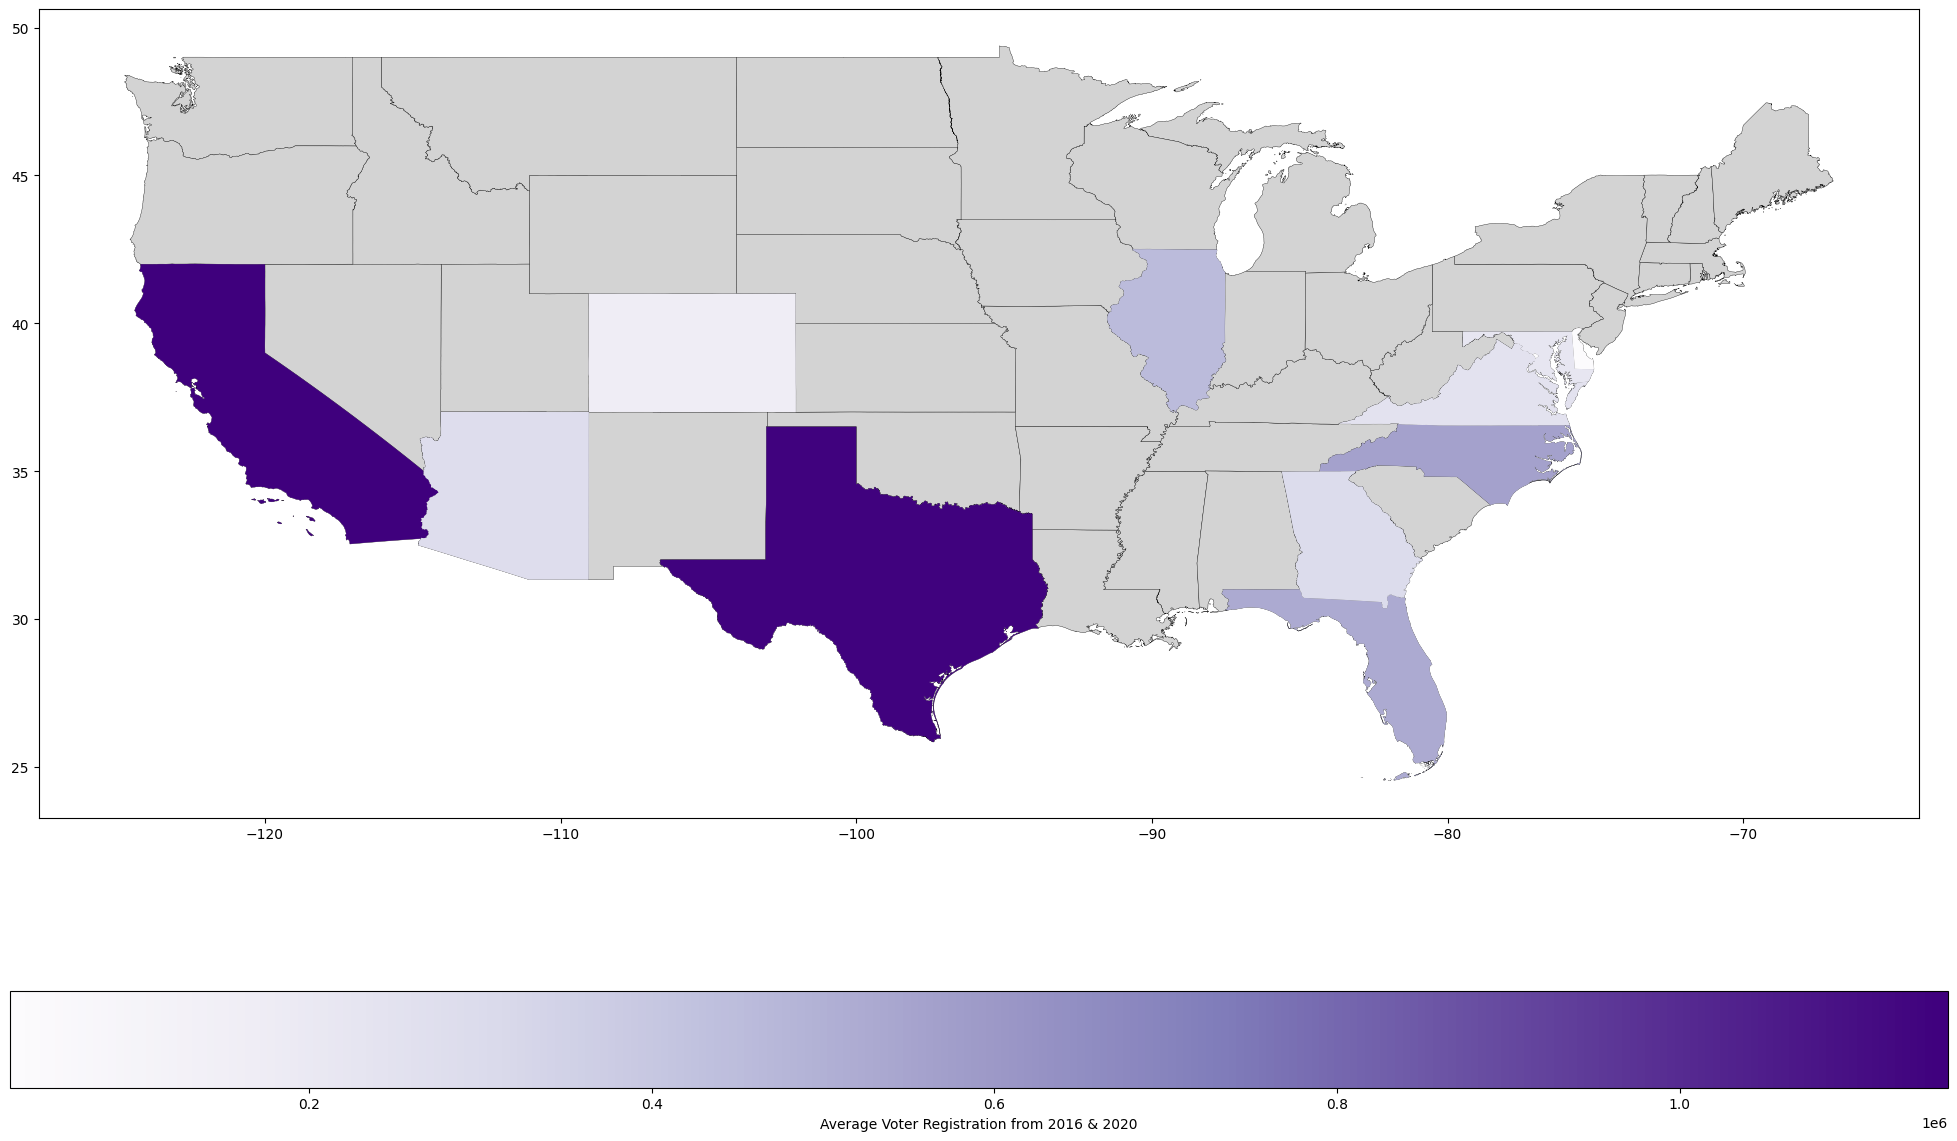

In [46]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
bbox.plot(ax=ax,color="lightgray",linewidth=.25,edgecolor="black")
state_avg.plot(column="registered_voters", ax=ax, legend=True,cmap="Purples",
            legend_kwds={"label": "Average Voter Registration from 2016 & 2020",
            "orientation": "horizontal"})
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


  When comparing the voter registration from 2016 and 2020, January
and February were the months that voter registration spiked. However, as a result of the covid pandemic, the following months March, April, and May had a decline in 2020 voter registration in comparison to the voter registration in 2016 during those same months. It can also be noted that when looking at the total voter registration in 2016, the new voters in Juanary almost doubles by April. In 2020, January begings high, and instead of following the trend from 2016, April dips a significant amount as Covid struck mid March.
    

I would offer my client to look more into ways to look into why states like Deleware and District of Colombia need more advertisement towards registering to vote. Look into factors that may have resulted in this aside from population. I would also offer to research more what resulted in the surge of new voter registrations when comparing the months of January/February 2016 vs January/February 2020. Covid was a main factor in it declining, but if this had not happened, how would the new voter registrations fallen? And what influenced the surge between the years 2016-2020?

If I were to continue to work on this project, I would try to gather more data on the other states, however I see the website where the data is sourced from has only found data from these states during these few months. These limitations are important factors, especially with heavily populated states like New York missing from the data. I would try to look into certain demographics, and outliers aside from covid that contributed to the decline.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [45]:
#Allison Olazabal